# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry. We will load this data and use K-nearest neighbors to predict customer churn based on account characteristics. The data we will use are in a file called `Orange_Telecom_Churn_Data_OK.csv` found in the [GitHub repository](https://github.com/rosalvoneto/InteligenciaComputacional).

## Question 1

* Begin by importing the data. Examine the columns and data.

In [1]:
# Import the data
import pandas as pd

df = pd.read_csv('data/Orange_Telecom_Churn_Data_OK.csv')

df

,phone_number,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,382-4657,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,371-7191,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,358-1921,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,375-9999,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,330-6626,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,365-8751,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0.0
4996,334-9736,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333,1.0
4997,333-6861,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111,0.0
4998,394-2206,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000,0.0


## Question 2

* Notice that the data contains a phone number. Do you think this is good feature to use when building a machine learning model? Why or why not? 

We will not be using it, so it can be dropped from the data.

In [2]:
# Remove phone_number column
df = df.drop(['phone_number'], axis = 1)

## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [3]:
# Split the data into two dataframes
df_label = df.churned
df_feature = df.drop(['churned'], axis = 1)

print(df_label)
df_feature

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churned, Length: 5000, dtype: float64


,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [4]:
# Fit a K-nearest neighbors model with a value of k=3
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [19]:
# Function to calculate accuracy
from sklearn.metrics import accuracy_score

def knn_accuracy(X_data, Y_data):
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN = KNN.fit(X_data, Y_data)
    Y_predicted = KNN.predict(X_data)

    return accuracy_score(Y_data, Y_predicted)

In [20]:
# Using the function
knn_accuracy(df_feature, df_label)

0.9422

## Question 5

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20.  Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [49]:
# K-nearest neighbors model
fits = {
    'k': list(range(1, 21)),
    'accuracy': [
        x for x in [
            accuracy_score(df_label,
                KNeighborsClassifier(n_neighbors=k).fit(df_feature, df_label).predict(df_feature)
            ) for k in range(1, 21)
        ]
    ]
}

fits

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'accuracy': [1.0,
  0.9292,
  0.9422,
  0.9154,
  0.9284,
  0.9156,
  0.9254,
  0.9122,
  0.9224,
  0.9092,
  0.9158,
  0.9076,
  0.9148,
  0.905,
  0.9098,
  0.9044,
  0.908,
  0.9028,
  0.9078,
  0.902]}

<BarContainer object of 20 artists>

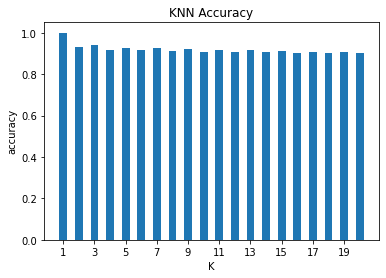

In [50]:
# Plot
import matplotlib.pyplot as plt

plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('KNN Accuracy')

ticks = [ x for x in fits['k'] if x%2 == 1 ]
plt.xticks(ticks, ticks)

plt.bar(fits['k'], fits['accuracy'], width=0.5)